In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import glob
import openpyxl

In [3]:
os.chdir('C:\\Users\\josel\\Downloads')

In [4]:
pwd

'C:\\Users\\josel\\Downloads'

In [27]:
df=pd.read_csv('statistics (8).csv')

In [28]:
type(df['Opens rate'][0])

str

In [29]:
df['Opens rate'] = df['Opens rate'].str.rstrip('%').astype('float') / 100.0

In [30]:
df['Date']= pd.to_datetime(df['Started'])

In [31]:
df.drop('Unique Unsubs',axis=1,inplace=True)
df.drop('Unsubs rate',axis=1,inplace=True)

In [32]:
df['Project Number']=df['Campaign'].str.split('_').str[0]

In [33]:
df['Client']=df['Campaign'].str.split('_').str[1]+' ' +df['Campaign'].str.split('_').str[2]

In [34]:
df['Sent'].sum()

559182

In [35]:
newdf=df.groupby(pd.Grouper(key='Date', freq='d')).sum()

In [36]:
newdf.index = newdf.index.strftime('%d-%m-%Y')

In [37]:
newdf.head()

,Sent,Unique Renders / Opens,Opens rate,Unique Clicks,Bounced Recipients (Unique Bounces),Unique Complaints
Date,,,,,,
26-04-2022,180931,24252,0.2816,837,94806,2
27-04-2022,0,0,0.0000,0,0,0
28-04-2022,0,0,0.0000,0,0,0
29-04-2022,139656,13405,0.1923,496,69949,0
30-04-2022,0,0,0.0000,0,0,0


In [38]:
idx=newdf.index
idx

Index(['26-04-2022', '27-04-2022', '28-04-2022', '29-04-2022', '30-04-2022',
       '01-05-2022', '02-05-2022', '03-05-2022', '04-05-2022', '05-05-2022',
       '06-05-2022', '07-05-2022', '08-05-2022', '09-05-2022', '10-05-2022',
       '11-05-2022'],
      dtype='object', name='Date')

In [39]:
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import matplotlib.dates as dates

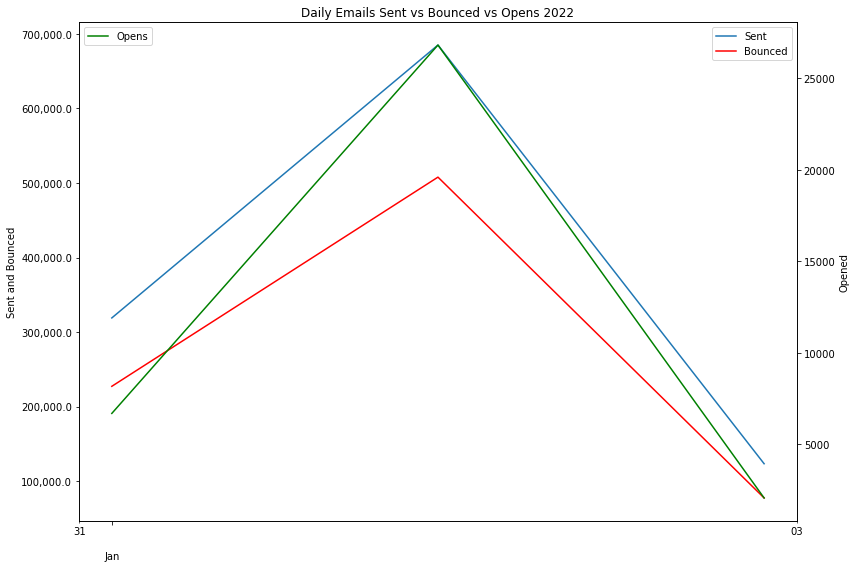

In [37]:
#Create canvas
fig,ax=plt.subplots(figsize=(12,8))
#Plot first line with date as x axis
ax.plot_date(idx,newdf['Sent'],'-',label='Sent')
#Plot second line
ax.plot(newdf['Bounced Recipients (Unique Bounces)'],label='Bounced',color='Red')
#Plot third line on left y-axis
ax2=ax.twinx()
ax2.plot(newdf['Unique Renders / Opens'],label='Opens',color='Green')
#Add labels and title
ax2.set_ylabel('Opened')
ax.set_ylabel('Sent and Bounced')
ax.set_title('Daily Emails Sent vs Bounced vs Opens 2022')

#Locating
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b'))
#Formatting
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

#Show
ax.legend()
ax2.legend(loc=2)
plt.tight_layout()
fig.savefig('mypicture.png',dpi=200)

In [23]:
#only a specific part
#idx=newdf.loc['2022-01-01':'2022-03-23'].index

KeyError: ''

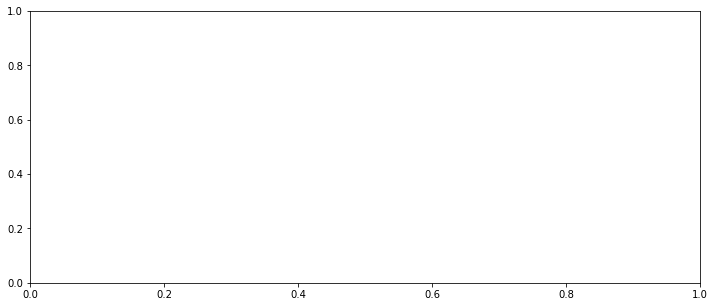

In [38]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot_date(idx,newdf[''],'-')

#Locating
ax.xaxis.set_major_locator(dates.MonthLocator())
#Formatting
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b-%Y'))

fig.autofmt_xdate()
plt.tight_layout()


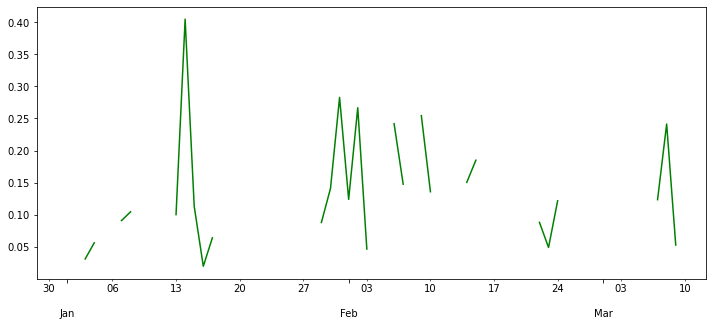

In [20]:
idx=newdf.index
fig,ax=plt.subplots(figsize=(12,5))
ax.plot_date(idx,newdf['Opens rate'],'-',color='Green')

#Locating
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b'))
#Formatting
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

#fig.savefig('mypicture.png',dpi=200)

In [28]:
df=df.set_index('Date')

In [20]:
#Like a group by but for dates
#Daily sent sum
df['Sent'].resample(rule='D').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

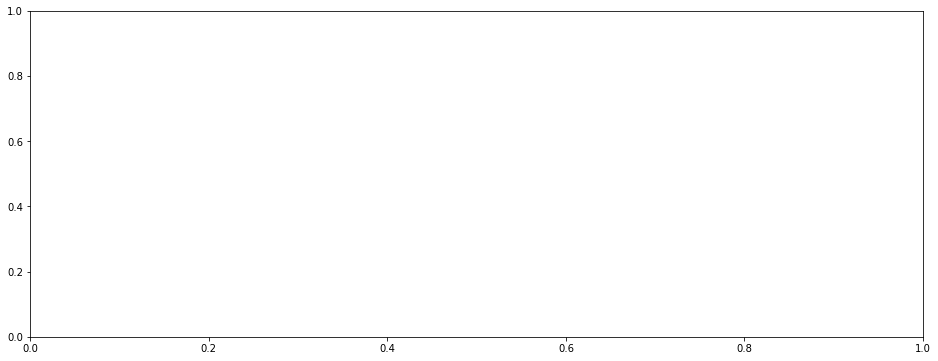

In [23]:
fig,ax=plt.subplots(figsize=(16,6))
df['Sent'].resample(rule='D').count().plot(kind='bar',figsize=(16,6))

ax.set_ylabel('Sent Emails')
ax.set_title('Number of Emails for 27905')

#Locating
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%b'))
#Formatting
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

#Gridlines
plt.grid(axis='y')

#Show
plt.tight_layout()
#fig.savefig('count_of_campaigns.png',dpi=200)

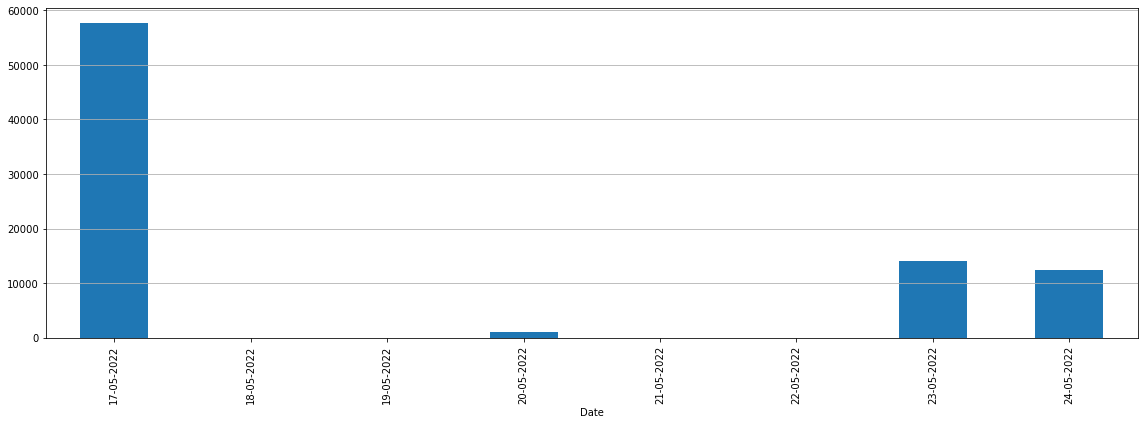

In [22]:
newdf['Sent'].plot(kind='bar',figsize=(16,6))


#Gridlines
plt.grid(axis='y')

#Show
plt.tight_layout()
#fig.savefig('count_of_campaigns.png',dpi=200)

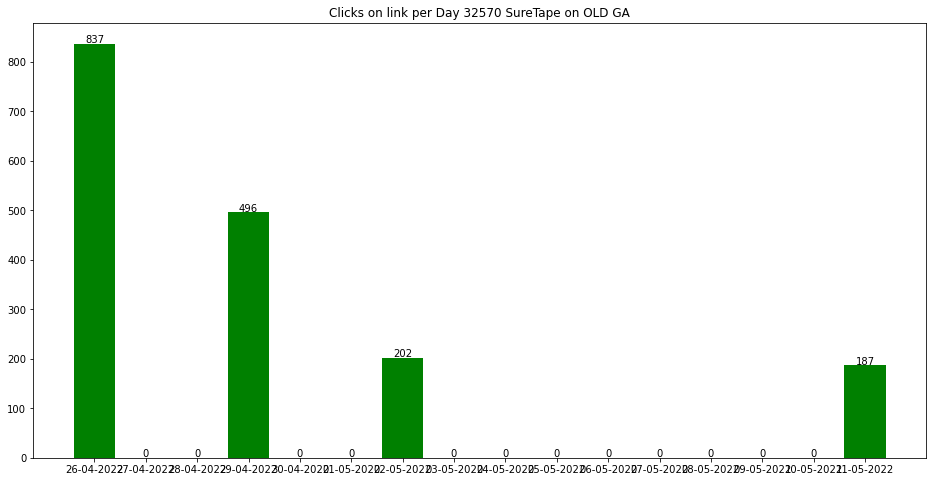

In [41]:
fig=plt.figure(figsize=(16,8))
xs = newdf.index
ys = newdf['Unique Clicks']

plt.bar(xs,ys,color='green')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,1), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.title('Clicks on link per Day 32570 SureTape on OLD GA')
fig.savefig('Clicks on link SureTape OLD GA.png',dpi=200)

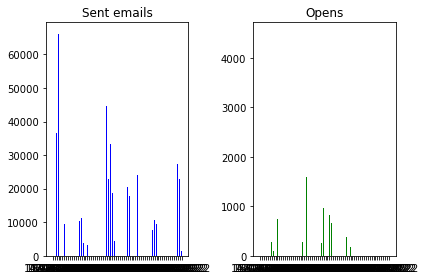

In [26]:
fig,ax=plt.subplots(ncols=2,nrows=1)
x=newdf.index
ax[0].bar(x, newdf['Sent'], color = 'b', width = 0.25)
ax[1].bar(x, newdf['Unique Renders / Opens'], color = 'g', width = 0.25)


ax[0].set_title('Sent emails')
ax[1].set_title('Opens')

plt.tight_layout()

fig.savefig('Sent Emails vs Opens Mena Builder AI.png',dpi=200)


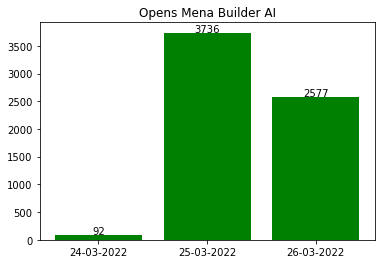

In [92]:
fig=plt.figure()
xs = newdf.index
ys = newdf['Unique Renders / Opens']

plt.bar(xs,ys,color='Green')

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,1), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.title('Opens Mena Builder AI')

fig.savefig('Opens Mena Builder AI.png',dpi=200)